<a href="https://colab.research.google.com/github/madhu-1013/DS_internship/blob/main/Black_Friday_Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Engineering**

In [17]:
#import data set

import pandas as pd
df=pd.read_csv("train.csv")
print(df)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1            

In [2]:
#identify missing value
print(df.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [3]:
#Dealing with missing values
df['Product_Category_2'].fillna((df['Product_Category_2'].median()), inplace=True) #Imputing Numerical Values, removed extra space in column name
df['Product_Category_3'].fillna((df['Product_Category_3'].mean()), inplace=True)  #Imputing Categorical Values
print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 9.0           12.668243      8370  
1                 6.0           14.000000     15200  
2                 9.0           12.668243   

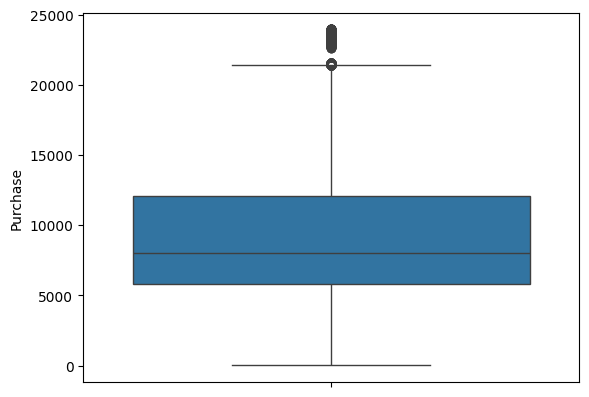

In [4]:
#Identifying Outliers by ploting
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Purchase'])
plt.show()

In [5]:
#Dealing with Outliers using Interquantile Range

print(df['Purchase'])
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Purchase'] < lower].values
out2=df[df['Purchase'] > upper].values

df['Purchase'].replace(out1,lower,inplace=True)
df['Purchase'].replace(out2,upper,inplace=True)

print(df['Purchase'])

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64
6231.0
21400.5
-3523.5
0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64


In [6]:
# Numerical to Categorical

# Convert 'quality' column back to numeric if it's not
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

from sklearn.preprocessing import LabelEncoder


df['Purchase']=pd.cut(df['Purchase'],3,labels=['0','1','2'])
print(df)
X = df.drop('Product_ID', axis=1)
X = df.drop('Stay_In_Current_City_Years', axis=1)
X = X.drop('Purchase', axis=1)
Y = df['Purchase']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1            

In [7]:
# Convert categorical variables into numerical formats
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])

In [8]:
#Dealing with imbalance
#Random Over Sampling
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

Counter({0: 267585, 1: 220824, 2: 61659})
Counter({1: 267585, 0: 267585, 2: 267585})


In [9]:
# Define features and target
X = df.drop(['Product_ID', 'Purchase'], axis=1)
Y = df['Purchase']

In [10]:
#Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Drop non-numeric columns before applying chi2
X_numeric = X.select_dtypes(include=['number'])

# Fill or remove NaN values
X_numeric = X_numeric.fillna(X_numeric.mean()) # Fill with mean, or use another strategy

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_numeric,Y)  # Use the numeric DataFrame here
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_numeric.columns)  # Use the numeric DataFrame here
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Category', 'Purchase']

print(featuresScores)

             Category       Purchase
0             User_ID      52.122577
1              Gender     314.799354
2                 Age     129.032910
3          Occupation     891.655321
4       City_Category    1136.755578
5      Marital_Status       1.946129
6  Product_Category_1  153394.346321
7  Product_Category_2   28488.338148
8  Product_Category_3     617.719593


[0.24443194 0.00538405 0.04565581 0.09261429 0.01149823 0.00962925
 0.41357965 0.10874482 0.06846197]


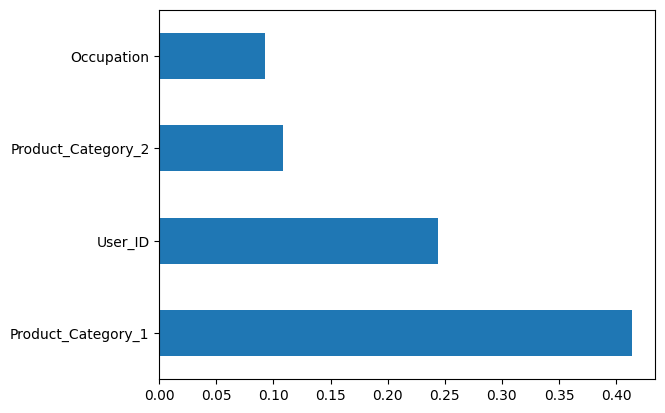

In [11]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
# Drop non-numeric columns before fitting the model
X_numeric = X.select_dtypes(include=['number'])

# Fill NaN values with the mean of each column
X_numeric = X_numeric.fillna(X_numeric.mean()) # Or use another imputation strategy

model.fit(X_numeric,Y)  # Use the numeric DataFrame here
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_numeric.columns) # Use the numeric DataFrame here
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [12]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier # Import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

pca=PCA(n_components=2)
X = df.drop('Product_ID', axis=1)
X = X.drop('Purchase', axis=1)
Y = df['Purchase']

# Convert any remaining categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X)

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

# Fit the Random Forest model
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test) # Make predictions using the Random Forest
print(accuracy_score(y_test,y_pred))

[[ 3.02784265e+03  1.60531840e+00]
 [ 3.02784268e+03  1.62390971e+00]
 [ 3.02784257e+03  1.54301757e+00]
 ...
 [-3.00715707e+03  7.07735715e+00]
 [-3.00915846e+03 -6.83803058e+00]
 [-3.01015848e+03 -7.87836655e+00]]
0.6527472261106162


# **Visualization**

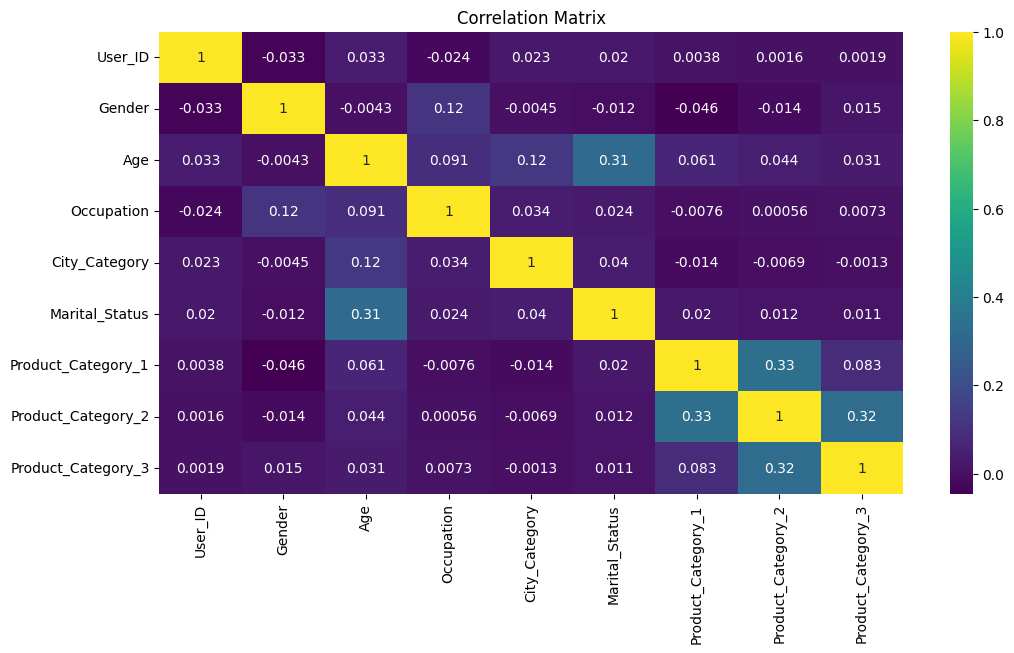

In [13]:
# Handle non-numeric columns
plt.figure(figsize=(12, 6))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-14-32fdb6a079b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Purchase', data=df, palette='viridis')  # Pass the DataFrame to 'data'


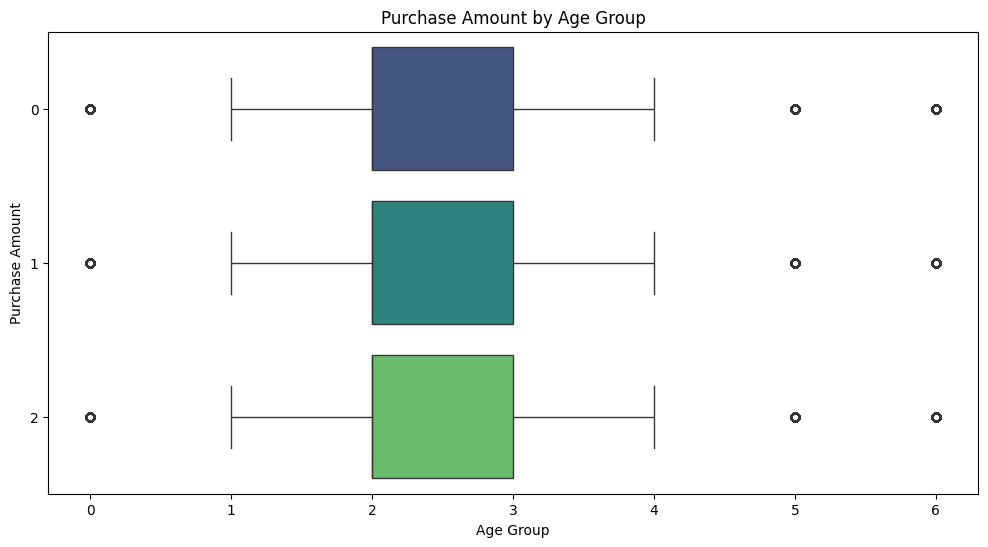

In [14]:
plt.figure(figsize=(12, 6))
# Ensure 'df' is the correct DataFrame containing 'Age' and 'Purchase' columns
sns.boxplot(x='Age', y='Purchase', data=df, palette='viridis')  # Pass the DataFrame to 'data'
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

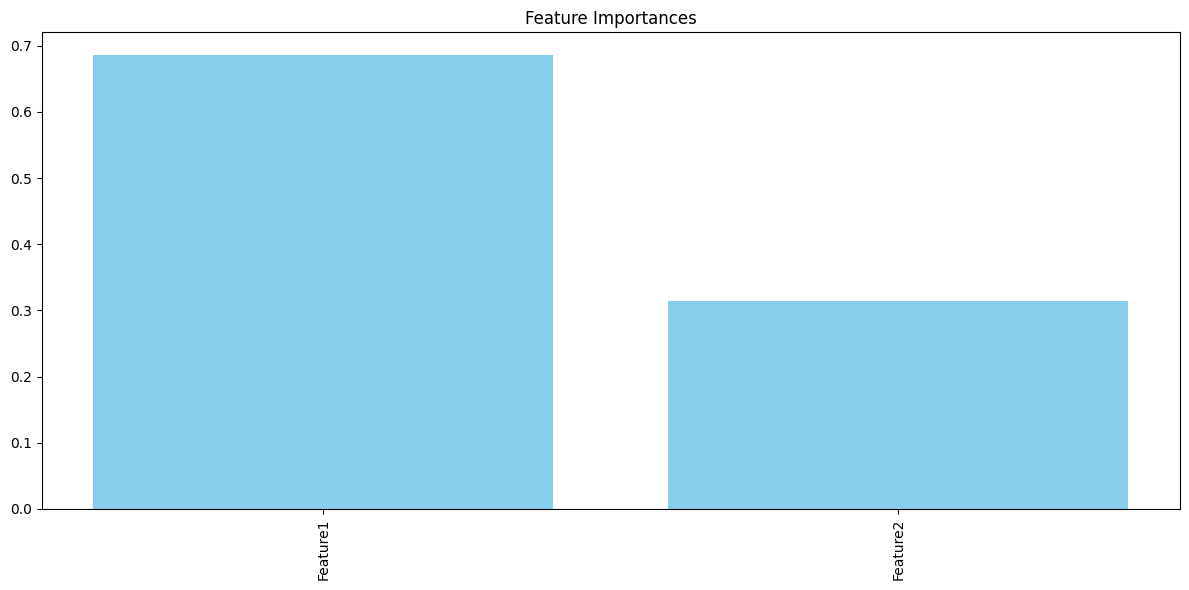

In [18]:
import numpy as np
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selector.fit(X, Y)

# Get feature importances
importances = rf_selector.feature_importances_
indices = np.argsort(importances)[::-1]

# Assuming 'feature_names' holds the original feature names
feature_names = ['Feature1', 'Feature2']  # Replace with your actual feature names

# Select top features
selected_features = [feature_names[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center', color='skyblue')
plt.xticks(range(len(importances)), [selected_features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

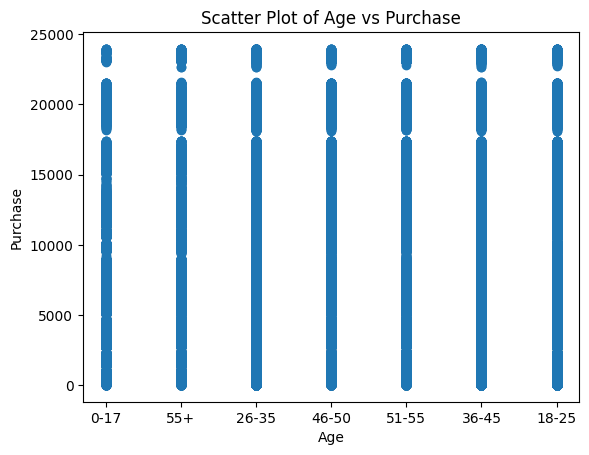

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the wine quality dataset (assuming it's in CSV format)
wine_data = pd.read_csv('train.csv')

# Plotting PetalLengthCm vs PetalWidthCm
plt.scatter(wine_data['Age'], wine_data['Purchase'])
plt.title("Scatter Plot of Age vs Purchase")
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.show()

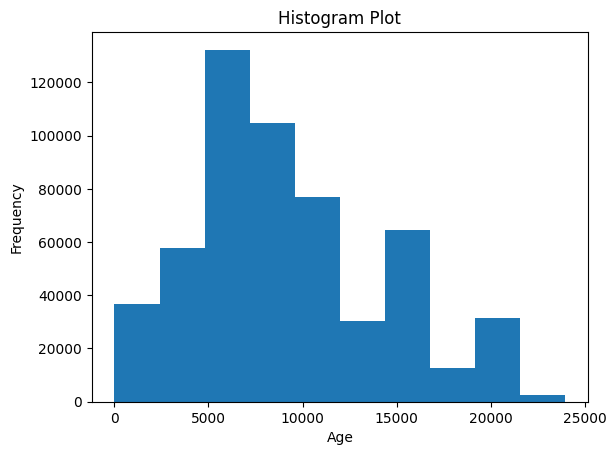

In [20]:
#Histrogram shows the distribution of a continuous variable.
  # It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["Purchase"])
plt.title("Histogram Plot")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()